In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [4]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [5]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [6]:
word_dict['Artist']

{'Marshmello': 0,
 'Bon Iver': 1,
 'Kamasi Washington': 2,
 'Drake': 3,
 'Alicia Keys': 4,
 'Major Lazer': 5,
 'J. Cole': 6,
 'Flume': 7,
 'Tame Impala': 8,
 nan: nan,
 'Chance the Rapper': 10,
 'Kanye West': 11,
 'deadmau5': 12,
 'Rihanna': 13,
 'Dua Lipa': 14,
 'The Chainsmokers': 15,
 'Billie Eilish': 16,
 'Soccer Mommy': 17,
 'Sufjan Stevens': 18,
 'Parquet Courts': 19,
 'Phoebe Bridgers': 20,
 'Mac DeMarco': 21,
 'Disclosure': 22,
 'Tyler, The Creator': 23,
 'Black Midi': 24,
 'Charli XCX': 25,
 'Julien Baker': 26,
 'Grimes': 27,
 'Pharrell Williams': 28,
 'Khruangbin': 29,
 'Alt-J': 30,
 'The 1975': 31,
 'Vampire Weekend': 32,
 'Halsey': 33,
 'Big Thief': 34,
 'Justin Bieber': 35,
 'Robyn': 36,
 'Shawn Mendes': 37,
 'Mitski': 38,
 'Anderson .Paak': 39,
 'Angel Olsen': 40,
 'Fontaines D.C.': 41,
 'Justice': 42,
 'Skrillex': 43,
 'Swedish House Mafia': 44,
 'Kurt Vile': 45,
 'Travis Scott': 46,
 'The Weeknd': 47,
 'Avicii': 48,
 'SZA': 49,
 'FKA twigs': 50,
 'Jay-Z': 51,
 'Lizzo': 

In [7]:
df_train.tail(40)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
17130,0.0,0.985075,2.0,-24.726,0.0337,6.814720e-01,0.001360,0.241804,0.0000,82.572,...,White Noise Calming Piano Melodies,NaN,NaN,https://www.youtube.com/watch?v=YU0H88DRnMg,NaN,Provided to YouTube by Revelator Ltd.\n\nWhite...,White Noise Baby Sleep Melody,Sleepy Penguin - Topic,Finneas O'Connell,Post Malone
17131,8.0,0.313047,9.0,-5.516,0.0410,1.381884e-01,0.000015,0.000890,0.2040,119.932,...,Sie weiß (feat. Mero),spotify:track:7DyDjhZMEIK5Ied4juTCyc,NaN,NaN,6836.0,„Sie weiß“ jetzt überall STREAMEN: \nhttps://A...,AYLIVA x MERO - Sie weiß (prod. by Frio & Kyree),AYLIVA,Juicy J,Phoebe Bridgers
17132,4.0,0.096072,5.0,-7.159,0.0374,2.744000e-03,0.000000,0.018191,0.0758,77.525,...,Weisses Herz,spotify:track:1kKvfCmzXzRcfszwQrXFPM,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=3T6pp6bH9HE,3561.0,NaN,AYLIVA - Bei Nacht (prod. by masri),AYLIVA,Louis Bell,NaN
17133,4.0,NaN,2.0,-8.914,0.0613,2.500470e-01,0.000000,0.000359,0.3400,155.110,...,Weisses Herz,spotify:track:41x0eQ9FsOeUNyoqjLJtAX,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=e36m_R5SfkA,38.0,Provided to YouTube by Whiteheart Records/WM G...,Gott sei Dank,NaN,Finneas O'Connell,deadmau5
17134,7.0,NaN,4.0,-7.749,0.0478,1.471980e-04,0.000000,0.001191,0.3070,89.940,...,NaN,spotify:track:0JTz8ZeBJtnjRIWiJnHFdO,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,NaN,5356.0,„Was Besseres“ jetzt überall STREAMEN: \nhttps...,AYLIVA x MUDI - Was Besseres (Official Video),AYLIVA,Mike Dean,Sufjan Stevens
17135,3.0,NaN,9.0,NaN,0.0504,7.880599e-03,0.000000,0.001093,0.0728,82.773,...,Weisses Herz,spotify:track:2jExme1T0ORJ0tL3pq5dhs,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=SU6xmOp8FYY,2487.0,„Schmetterlinge“ jetzt überall STREAMEN: \nhtt...,AYLIVA - Schmetterlinge (prod. by Lee),NaN,Yeti Beats,Kamasi Washington
17136,3.0,0.143878,9.0,NaN,0.0401,1.619428e-02,0.000788,0.040354,NaN,120.105,...,Während du,spotify:track:5MUS9tGxfXLphZRAcyyWnC,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,NaN,2533.0,„Während du“ jetzt überall STREAMEN: \nhttps:/...,AYLIVA - Während du (prod. by masri),AYLIVA,NaN,The Chainsmokers
17137,6.0,0.229221,1.0,-6.998,0.2080,1.860963e-02,0.000000,0.000654,NaN,170.179,...,Weisses Herz,spotify:track:2g4FPrvea8sYly3ihGRgwE,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=H-MiQVcuxGs,5100.0,„Deine Schuld“ jetzt überall STREAMEN: https:/...,AYLIVA - Deine Schuld (prod. by Blurry & Babyb...,AYLIVA,NaN,FKA twigs
17138,6.0,0.273359,10.0,-4.984,0.0575,6.545083e-02,0.000000,0.002147,0.1110,92.903,...,Weisses Herz,spotify:track:3N1jiT8HQrhJQpwfLvy0hA,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=QoTipwnUQZg,5035.0,„Bleib“ jetzt überall STREAMEN: \nhttps://AYLI...,"AYLIVA x MILANO - Bleib (prod. by Sonnek, Tyme)",AYLIVA,Louis Bell,Kanye West
17139,5.0,0.024897,NaN,-10.017,0.0347,1.522733e-01,0.000000,0.005268,0.2390,NaN,...,Weisses Herz,spotify:track:3ahWkIbu2Tl56O75Z4HvXP,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=8ag1FdNfEck,NaN,Provided to YouTube by Whiteheart Records/WM G...,Was du nicht weisst,AYLIVA - Topic,Yeti Beats,NaN


In [8]:
for x in df_train['Uri'].values:
    print(x)

spotify:track:7njAZhca4o80qQdCgyEWya
spotify:track:2nnXe7n3Vivs7OfQKRsfWD
spotify:track:0VQMAup2VdeQWLCvM14Uz2
spotify:track:1M2nd8jNUkkwrc1dgBPTJz
spotify:track:2Ms33RTRCT6gArrpcrPxmo
nan
spotify:track:4lO57zZGFcj7vSY4QhfVDq
spotify:track:5NlFXQ0si6U87gXs6hq81B
spotify:track:0SLtqCrXBRrnkxSOMA3X4W
nan
spotify:track:7jBePLCZlKuEUc3rSc6izU
spotify:track:4dZ3V71vsqSn9MJ18y8YaJ
spotify:track:6yM5jM2eAq3k8NojZ7dLp1
spotify:track:0V5cvmTKsYmF5FmGGEAfmS
spotify:track:18oB9NlhCMSzlte5KAj5tl
spotify:track:5fqYqPWlfQhIkcUY3XAJlm
nan
spotify:track:1GIPP103zfsythULEpsmdw
spotify:track:5sQumEFLTZ7OWMbKg7Pq0J
spotify:track:1e1a7eAlICks9mch3UVsEH
nan
spotify:track:3VtlSKbs0IjVeeRV4otHNT
spotify:track:1gZ7i4qxXkHZb1r6eioaAP
spotify:track:0YImOCkIJ2PWhCXaURCZnY
spotify:track:7gKgd0P3dAAePiSQQBqrlf
spotify:track:1NHwvBmrUje4L1dxfWnXCH
spotify:track:0bzX26mfmUi0djOLemE2b8
spotify:track:47wZfF4OdME3xkIPhhpSSF
spotify:track:3HVJbdz0V402U5YggQK4Ao
spotify:track:6OquGsVTLqZHyxqG0PLwFz
spotify:track:0xDxS2g7

In [9]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [10]:
df_train_embedding = data_convert(df_train, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [11]:
df_test_embedding = data_convert(df_test, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [12]:
word_dict['Album']

{'Sinkovsky Plays and Sings Vivaldi': 0,
 nan: nan,
 'Vivaldi: The Four Seasons': 2,
 'Life Thru A Lens': 3,
 'Escapology': 4,
 "Sing When You're Winning": 5,
 "I've Been Expecting You": 6,
 'Take The Crown (Deluxe Edition)': 7,
 "Swing When You're Winning": 8,
 'The Christmas Present (Deluxe)': 9,
 'Je te laisserai des mots': 10,
 'Better in the Shade': 11,
 'Close to Paradise': 12,
 'Sit Down Beside Me': 13,
 'Wave': 14,
 'Mélancolie': 15,
 'Love Songs For Robots': 16,
 'PCD': 17,
 "It Ain't Safe No More. . .": 18,
 'When Disaster Strikes...': 19,
 'ETA (with Snoop Dogg, Busta Rhymes & Anderson .Paak)': 20,
 'Extinction Level Event: The Final World Front': 21,
 'The Big Bang': 22,
 'NOT TiGHT': 23,
 'The Remixes': 24,
 'Genesis': 25,
 'McCartney II (Special Edition)': 26,
 'FourFiveSeconds': 27,
 'McCartney (Archive Collection)': 28,
 'Pipes Of Peace': 29,
 'McCartney III Imagined': 30,
 'Off The Ground': 31,
 'Tug Of War': 32,
 'Ram (Archive Collection)': 33,
 'Big Bang': 34,
 'Nect

In [13]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)

/tmp/ipykernel_1836/2578188673.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)


In [14]:
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()


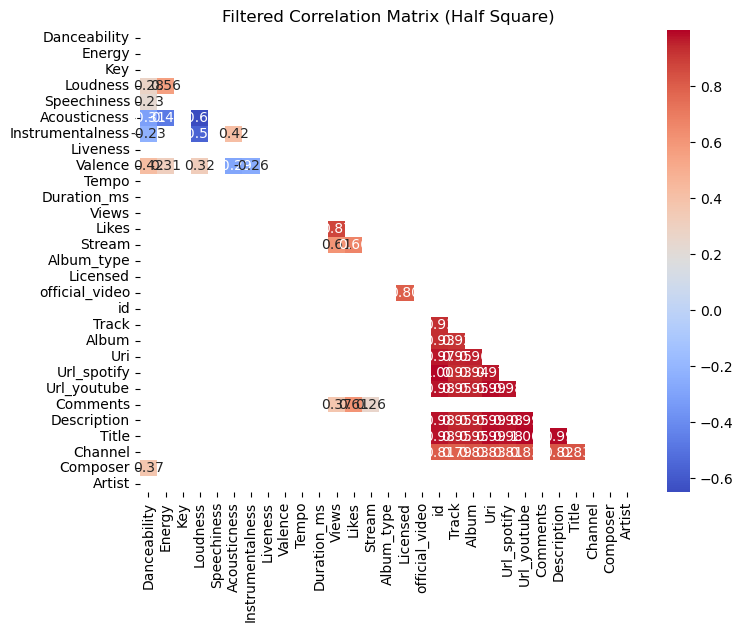

In [15]:
corr_matrix_with_threshold(df_train_embedding, 0.2)

In [16]:
def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [17]:
arr_NOT_important_column = ['Uri', 'Url_youtube', 'Description', 'id', 'Title']
df_train_embedding_important = remove_unimportant_column(df_train_embedding, arr_NOT_important_column)
df_test_embedding_important = remove_unimportant_column(df_test_embedding, arr_NOT_important_column)

In [18]:
df_train_embedding_important

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Comments,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,7.241508e-01,0.000062,0.000807,0.3400,83.398,...,0.0,0.0,0.0,NaN,0.0,0.0,3070.0,0.0,NaN,0.0
1,0.0,0.184220,7.0,NaN,NaN,6.722214e-01,0.910000,0.034966,0.7460,148.692,...,NaN,0.0,NaN,1.0,NaN,0.0,122.0,1.0,1.0,1.0
2,0.0,NaN,6.0,-15.596,NaN,6.676276e-01,0.867000,0.001772,0.3800,84.899,...,NaN,0.0,0.0,2.0,2.0,0.0,122.0,1.0,1.0,2.0
3,1.0,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,...,0.0,1.0,NaN,3.0,3.0,1.0,24350.0,2.0,2.0,3.0
4,4.0,NaN,5.0,NaN,0.0260,3.048625e-06,0.000467,0.002924,0.2950,97.997,...,0.0,1.0,2.0,4.0,4.0,1.0,31150.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,-6.344,0.0328,8.991539e-02,0.000000,0.000591,0.6580,90.002,...,NaN,1.0,2.0,12972.0,9170.0,1823.0,0.0,5190.0,1.0,50.0
17166,2.0,0.820026,4.0,-1.786,NaN,2.195200e-05,0.000000,0.000786,0.6570,174.869,...,2.0,1.0,NaN,12973.0,9171.0,1823.0,0.0,5190.0,3.0,36.0
17167,1.0,0.571787,4.0,-4.679,0.0647,NaN,0.000000,0.003652,0.4190,168.388,...,2.0,1.0,2.0,12974.0,9172.0,1823.0,0.0,NaN,4.0,NaN
17168,1.0,0.451218,9.0,NaN,0.4190,4.511802e-02,NaN,0.001260,0.5390,155.378,...,2.0,1.0,2.0,12975.0,9173.0,1823.0,0.0,5190.0,1.0,70.0


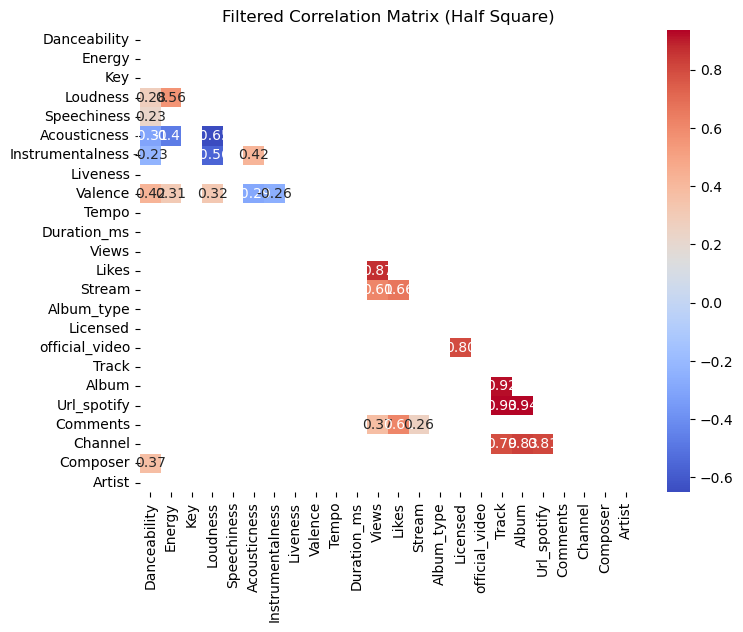

In [19]:
corr_matrix_with_threshold(df_train_embedding_important, 0.2)

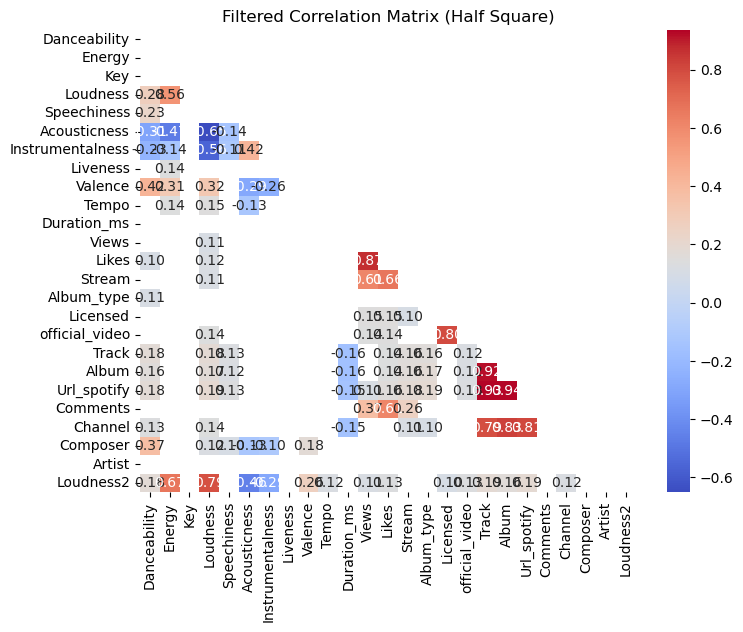

In [20]:
import math

def convert_decibel_to_numerical(dB_value):
    return 10**(dB_value / 10)

def feature_combination(df):
    df_connecting_tmp = df.copy()
#     df_connecting_tmp['Extra1'] = df_connecting_tmp['Valence']  * df_connecting_tmp['Url_spotify'] 
#     df_connecting_tmp['Extra2'] = df_connecting_tmp['Channel']  * df_connecting_tmp['Instrumentalness']
#     df_connecting_tmp['Extra3'] = df_connecting_tmp['Channel']  * df_connecting_tmp['Acousticness']
#     df_connecting_tmp['Extra2'] = df_connecting_tmp['Instrumentalness']  * df_connecting_tmp['Channel']
    df_connecting_tmp['Loudness2'] = df_connecting_tmp['Loudness'].apply(lambda x: convert_decibel_to_numerical(x)) 
    return df_connecting_tmp

df_train_feature_combination = feature_combination(df_train_embedding_important)
df_test_feature_combination = feature_combination(df_test_embedding_important)
corr_matrix_with_threshold(df_train_feature_combination, 0.1)

* Danceability ==> Valence: 0.424102 | Composer: 0.295219| Loudness: 0.275222 | Speechiness:0.228473|  Acousticness:-0.309605| Instrumentalness: -0.231177 | Likes: 0.103480| 
* Valence      ==> Loudness: 0.319542  |  Energy: 0.305514  |  Acousticness: -0.288254  | Instrumentalness: -0.258984  | Composer: 0.143226
* Composer     ==> Valence: 0.143226 | 
* Loudness     ==> Energy: 0.559834 | Valence: 0.319542 |Tempo: 0.146088	| Acousticness: -0.651000 |Instrumentalness: -0.563593 |  Views: 0.110302 | Likes: 0.123328 | Stream: 0.112378
* Speechiness  ==> Acousticness: -0.141015 |Instrumentalness: -0.113436
* Acousticness ==> Energy: -0.471571 | Loudness: -0.651000 |Instrumentalness: 0.416931| Energy: -0.471571 | Tempo: -0.127284
* Instrumentalness ==> Energy: -0.135264 | Loudness: -0.563593| Acousticness: 0.416931| Valence: -0.258984
* Likes ==> Views: 0.871248 |Stream: 0.664720 |Comments: 0.609587| Loudness:0.123328

In [21]:
# arr_NOT_important_column = [ 'Loudness', 'Url_spotify', 'Channel', 'Tempo', "Composer", 'Likes', 'Stream', 'Energy', 'Views', 'Track', 'Key', 'Liveness', 'Duration_ms',  'Album_type', 'Comments','Artist', 'Composer'  ]
arr_NOT_important_column = [ 'Loudness', 'Comments'  ]
# Without Feature Combination
# df_train_embedding_important_simple = remove_unimportant_column(df_train_embedding_important, arr_NOT_important_column)
# df_test_embedding_important_simple = remove_unimportant_column(df_test_embedding_important, arr_NOT_important_column)

# With Feature Combination
df_train_embedding_important_simple = remove_unimportant_column(df_train_feature_combination, arr_NOT_important_column)
df_test_embedding_important_simple = remove_unimportant_column(df_test_feature_combination, arr_NOT_important_column)

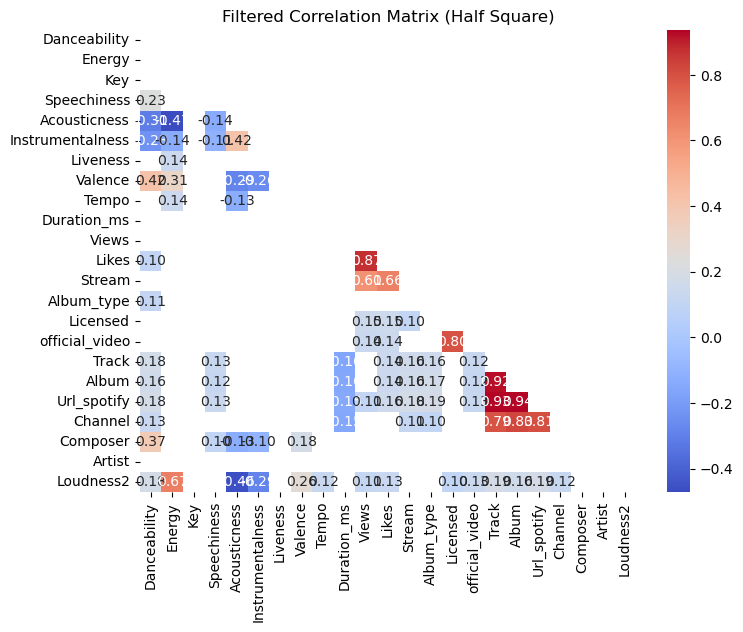

In [22]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.1)

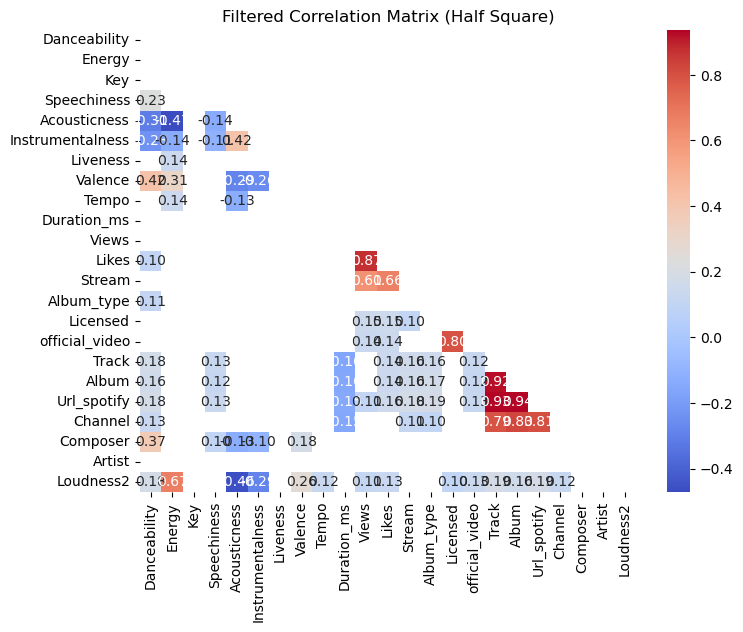

In [23]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.1)

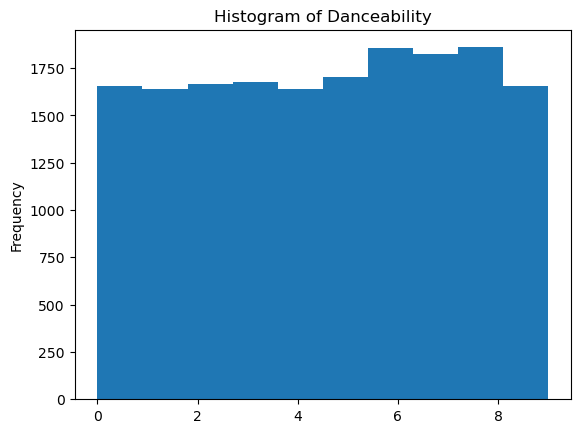

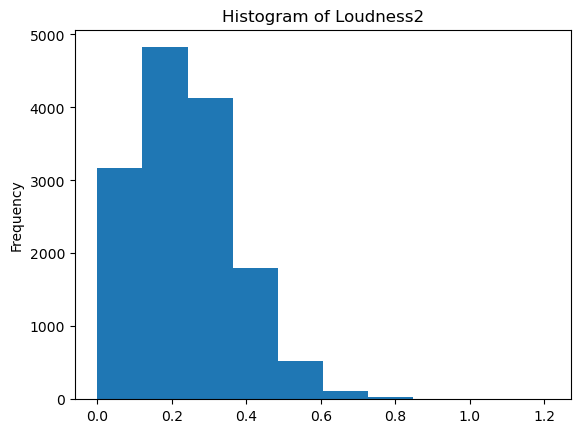

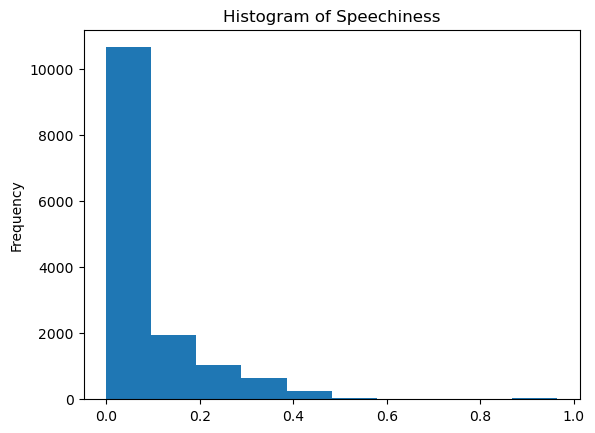

In [24]:
import matplotlib.pyplot as plt
def plot_hist(df, column):
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
plot_hist(df_train_embedding_important_simple, 'Danceability')
# plot_hist(df_train_embedding_important_simple, 'Loudness')
plot_hist(df_train_embedding_important_simple, 'Loudness2')
plot_hist(df_train_embedding_important_simple, 'Speechiness')


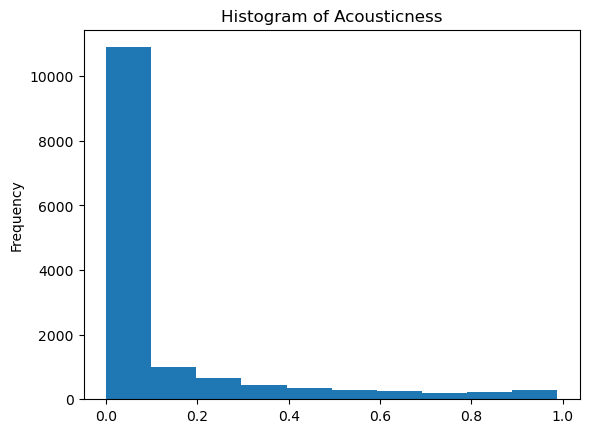

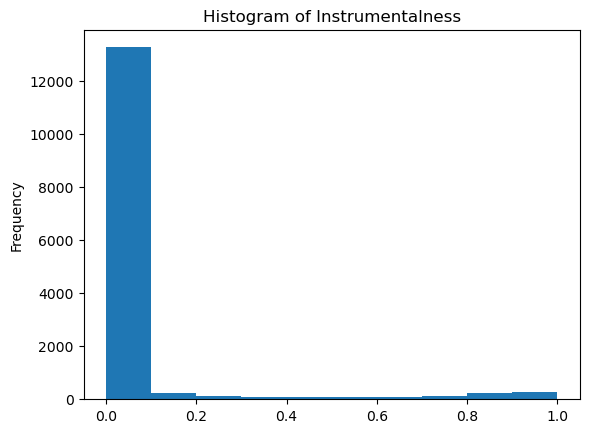

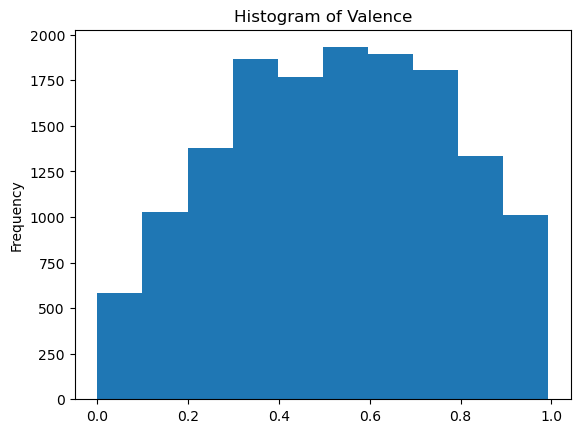

In [25]:
plot_hist(df_train_embedding_important_simple, 'Acousticness')
plot_hist(df_train_embedding_important_simple, 'Instrumentalness')
plot_hist(df_train_embedding_important_simple, 'Valence')


In [26]:
# plot_hist(df_train_embedding_important_simple, 'Likes')
# plot_hist(df_train_embedding_important_simple, 'Stream')
# plot_hist(df_train_embedding_important_simple, 'Channel')

In [27]:
min(df_train_embedding_important_simple['Loudness2'].values)

2.3708277395462832e-05

In [28]:
max(df_train_embedding_important_simple['Loudness2'].values)

1.210319415118767

In [29]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_train_embedding_important_simple.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_train_embedding_important_simple) - len(df_with_clean_data))


Clean Data without NaN: 485
Data with NaN: 16685


# Imputation "Composer" START

### Using df_with_clean_data (7k-ish) as training for guessing NaN values 

In [30]:
df_for_training_imputation = df_with_clean_data.copy()
df_for_training_imputation

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2
12,2.0,0.144703,6.0,0.0341,5.088448e-03,0.000000,0.002406,0.291,156.207,204640.0,...,0.0,0.0,0.0,10.0,5.0,1.0,5.0,2.0,10.0,0.185780
20,0.0,0.036265,8.0,0.0648,8.439086e-01,0.026300,0.046268,0.576,170.721,162286.0,...,2.0,0.0,0.0,17.0,15.0,3.0,8.0,1.0,16.0,0.050664
40,6.0,0.037595,7.0,0.0340,2.515376e-02,0.008450,0.000663,0.824,122.239,222533.0,...,0.0,1.0,2.0,33.0,33.0,5.0,17.0,5.0,7.0,0.044320
43,5.0,0.089315,0.0,0.0303,1.092154e-01,0.001050,0.000985,0.523,121.989,268867.0,...,0.0,0.0,0.0,36.0,35.0,6.0,19.0,2.0,0.0,0.048440
50,7.0,0.586376,9.0,0.0320,1.697459e-02,0.000013,0.033386,0.559,120.040,295013.0,...,0.0,1.0,2.0,43.0,39.0,6.0,20.0,8.0,16.0,0.293427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16989,6.0,0.868251,2.0,0.0705,4.913000e-09,0.000027,0.004411,0.130,121.888,129836.0,...,2.0,0.0,2.0,12858.0,9103.0,1805.0,5158.0,7.0,25.0,0.586138
17003,6.0,0.317215,4.0,0.0448,1.157625e-03,0.009550,0.039304,0.867,112.248,135903.0,...,2.0,0.0,2.0,12865.0,9108.0,1807.0,5161.0,8.0,57.0,0.175550
17032,3.0,0.082882,8.0,0.0428,6.162988e-02,0.000000,0.000372,0.862,188.651,170745.0,...,2.0,1.0,2.0,12885.0,9119.0,1810.0,5168.0,5.0,16.0,0.157435
17138,6.0,0.273359,10.0,0.0575,6.545083e-02,0.000000,0.002147,0.111,92.903,155239.0,...,0.0,1.0,2.0,12950.0,9160.0,1820.0,5185.0,2.0,11.0,0.317395


In [31]:
df_for_training_imputation_non_danceability = df_for_training_imputation.iloc[:,1:]
df_for_training_imputation_non_danceability

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2
12,0.144703,6.0,0.0341,5.088448e-03,0.000000,0.002406,0.291,156.207,204640.0,26341526.0,...,0.0,0.0,0.0,10.0,5.0,1.0,5.0,2.0,10.0,0.185780
20,0.036265,8.0,0.0648,8.439086e-01,0.026300,0.046268,0.576,170.721,162286.0,19436.0,...,2.0,0.0,0.0,17.0,15.0,3.0,8.0,1.0,16.0,0.050664
40,0.037595,7.0,0.0340,2.515376e-02,0.008450,0.000663,0.824,122.239,222533.0,7508.0,...,0.0,1.0,2.0,33.0,33.0,5.0,17.0,5.0,7.0,0.044320
43,0.089315,0.0,0.0303,1.092154e-01,0.001050,0.000985,0.523,121.989,268867.0,418605.0,...,0.0,0.0,0.0,36.0,35.0,6.0,19.0,2.0,0.0,0.048440
50,0.586376,9.0,0.0320,1.697459e-02,0.000013,0.033386,0.559,120.040,295013.0,11323375.0,...,0.0,1.0,2.0,43.0,39.0,6.0,20.0,8.0,16.0,0.293427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16989,0.868251,2.0,0.0705,4.913000e-09,0.000027,0.004411,0.130,121.888,129836.0,348332.0,...,2.0,0.0,2.0,12858.0,9103.0,1805.0,5158.0,7.0,25.0,0.586138
17003,0.317215,4.0,0.0448,1.157625e-03,0.009550,0.039304,0.867,112.248,135903.0,10365919.0,...,2.0,0.0,2.0,12865.0,9108.0,1807.0,5161.0,8.0,57.0,0.175550
17032,0.082882,8.0,0.0428,6.162988e-02,0.000000,0.000372,0.862,188.651,170745.0,296597400.0,...,2.0,1.0,2.0,12885.0,9119.0,1810.0,5168.0,5.0,16.0,0.157435
17138,0.273359,10.0,0.0575,6.545083e-02,0.000000,0.002147,0.111,92.903,155239.0,7232329.0,...,0.0,1.0,2.0,12950.0,9160.0,1820.0,5185.0,2.0,11.0,0.317395


## Imputer using KNN
### Naturally works well with continous range of target label

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
def generate_model_for_imputation_nan_with_KNN(df, important_columns, target_column):
    print("Target", target_column)
    print("Supporting", important_columns)
    y = df[target_column]
    X = df.drop(target_column, axis=1)
    X = X[important_columns]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsRegressor(n_neighbors=20)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
#     print(predictions)
#     print("Avg", np.mean(y_test))
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse) 
    print("------------------------------")
    # Calculate the accuracy of the model
    return model

arr_model = []
for target in df_for_training_imputation_non_danceability.columns:
    non_target = df_for_training_imputation_non_danceability.columns.drop([target])
    model = generate_model_for_imputation_nan_with_KNN(
        df_for_training_imputation_non_danceability, 
        non_target, 
        target
    )
    arr_model.append(model)


Target Energy
Supporting Index(['Key', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Stream',
       'Album_type', 'Licensed', 'official_video', 'Track', 'Album',
       'Url_spotify', 'Channel', 'Composer', 'Artist', 'Loudness2'],
      dtype='object')
Mean Squared Error: 0.06658952371819768
------------------------------
Target Key
Supporting Index(['Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Stream',
       'Album_type', 'Licensed', 'official_video', 'Track', 'Album',
       'Url_spotify', 'Channel', 'Composer', 'Artist', 'Loudness2'],
      dtype='object')
Mean Squared Error: 12.895902061855672
------------------------------
Target Speechiness
Supporting Index(['Energy', 'Key', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Stream',
       'Album_type', 'L

## Start the imputation proces for every important features


In [33]:
df_train_embedding_important_simple_with_nan = df_train_embedding_important_simple.drop(df_with_clean_data.index)
df_train_embedding_important_simple_with_nan.head(10)

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2
0,0.0,0.000273,3.0,0.0443,7.241508e-01,0.000062,0.000807,0.340,83.398,117907.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.003037
1,0.0,0.184220,7.0,NaN,6.722214e-01,0.910000,0.034966,0.746,148.692,173427.0,...,NaN,0.0,NaN,1.0,NaN,0.0,1.0,1.0,1.0,NaN
2,0.0,NaN,6.0,NaN,6.676276e-01,0.867000,0.001772,0.380,84.899,150667.0,...,NaN,0.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,0.027568
3,1.0,0.209585,NaN,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,265000.0,...,0.0,1.0,NaN,3.0,3.0,1.0,2.0,2.0,3.0,0.237083
4,4.0,NaN,5.0,0.0260,3.048625e-06,0.000467,0.002924,0.295,97.997,263867.0,...,0.0,1.0,2.0,4.0,4.0,1.0,2.0,3.0,4.0,NaN
5,6.0,0.442451,7.0,0.0326,1.757600e-05,0.000000,0.000944,0.842,103.032,260560.0,...,0.0,NaN,0.0,5.0,5.0,1.0,3.0,4.0,5.0,NaN
6,0.0,0.225867,10.0,0.0323,2.914342e-01,0.000011,0.010794,NaN,166.668,258027.0,...,0.0,1.0,2.0,NaN,6.0,1.0,2.0,1.0,6.0,NaN
7,6.0,0.494914,10.0,0.0414,4.983603e-05,0.000000,0.000334,0.879,116.043,NaN,...,0.0,1.0,2.0,6.0,7.0,1.0,2.0,4.0,7.0,0.217270
8,1.0,0.898632,10.0,NaN,4.826809e-12,NaN,0.000623,0.347,125.152,262000.0,...,0.0,NaN,2.0,7.0,3.0,1.0,2.0,1.0,8.0,0.314630
9,5.0,NaN,NaN,0.0261,7.895359e-02,NaN,0.005268,0.677,106.191,170493.0,...,0.0,1.0,2.0,8.0,8.0,NaN,2.0,2.0,NaN,NaN


In [34]:
np.sum(np.isnan(df_train_embedding_important_simple_with_nan['Loudness2']))

2569

In [35]:
# df_train_embedding_important_simple_imputed = pd.DataFrame(imputed_data, columns=df_train_embedding_important_simple.columns)

concat_all_for_imputer = pd.concat([df_train_embedding_important_simple.iloc[:,1:], df_test_embedding_important_simple])
concat_all_for_imputer

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.003037
1,0.184220,7.0,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,...,NaN,0.0,NaN,1.0,NaN,0.0,1.0,1.0,1.0,NaN
2,NaN,6.0,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,...,NaN,0.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,0.027568
3,0.209585,NaN,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,...,0.0,1.0,NaN,3.0,3.0,1.0,2.0,2.0,3.0,0.237083
4,NaN,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,...,0.0,1.0,2.0,4.0,4.0,1.0,2.0,3.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,...,0,1,2,11307,4855,209,2970,6,NaN,0.230840
6311,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,138726.388393,4.572846e+07,...,2,0,0,13251,3215,1631,4731,7,NaN,0.384719
6312,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,...,2,1,0,NaN,6738,1937,5845,4,23,0.262570
6313,0.204440,NaN,0.037676,0.003631,0.491785,0.030605,0.482987,NaN,180639.352865,1.728134e+07,...,0,1,2,NaN,7696,1689,197,7,1,0.069760


## Process Imputer which cannot use KNN:
## Key => mean()
## Tempo => mean()
## Duration_ms => mean()
## Views => mean() ????
## Likes => mean() ???
## Stream => mean() ???
## Url_spotify => 0

### First: Input using static first ..., so it would not be filled by KNN Imputer

In [36]:
mean = np.mean(concat_all_for_imputer['Key'])
concat_all_for_imputer['Key'] = concat_all_for_imputer['Key'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Tempo'])
concat_all_for_imputer['Tempo'] = concat_all_for_imputer['Tempo'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Duration_ms'])
concat_all_for_imputer['Duration_ms'] = concat_all_for_imputer['Duration_ms'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Views'])
concat_all_for_imputer['Views'] = concat_all_for_imputer['Views'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Likes'])
concat_all_for_imputer['Likes'] = concat_all_for_imputer['Likes'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Stream'])
concat_all_for_imputer['Stream'] = concat_all_for_imputer['Stream'].fillna(np.rint(mean))

concat_all_for_imputer['Url_spotify'] = concat_all_for_imputer['Tempo'].fillna(0)

concat_all_for_imputer['Album_type'] = concat_all_for_imputer['Album_type'].fillna(1)
concat_all_for_imputer['Licensed'] = concat_all_for_imputer['Licensed'].fillna(2)
concat_all_for_imputer['official_video'] = concat_all_for_imputer['official_video'].fillna(1)


concat_all_for_imputer['Track'] = concat_all_for_imputer['Track'].fillna(0)
concat_all_for_imputer['Album'] = concat_all_for_imputer['Album'].fillna(1)

concat_all_for_imputer['Artist'] = concat_all_for_imputer['Artist'].fillna(9)

concat_all_for_imputer['Composer'] = concat_all_for_imputer['Composer'].fillna(10)


In [37]:
concat_all_for_imputer

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,8.748155e+07,...,0.0,0.0,0.0,0.0,0.0,83.398000,0.0,10.0,0.0,0.003037
1,0.184220,7.0,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,...,1.0,0.0,1.0,1.0,1.0,148.692000,1.0,1.0,1.0,NaN
2,NaN,6.0,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,...,1.0,0.0,0.0,2.0,2.0,84.899000,1.0,1.0,2.0,0.027568
3,0.209585,5.0,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,...,0.0,1.0,1.0,3.0,3.0,150.220000,2.0,2.0,3.0,0.237083
4,NaN,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,...,0.0,1.0,2.0,4.0,4.0,97.997000,2.0,3.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,...,0.0,1.0,2.0,11307.0,4855.0,72.136829,2970,6.0,9.0,0.230840
6311,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,...,2.0,0.0,0.0,13251.0,3215.0,119.000000,4731,7.0,9.0,0.384719
6312,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,...,2.0,1.0,0.0,0.0,6738.0,87.969239,5845,4.0,23.0,0.262570
6313,0.204440,5.0,0.037676,0.003631,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,...,0.0,1.0,2.0,0.0,7696.0,119.000000,197,7.0,1.0,0.069760


In [38]:
concat_all_for_imputer

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,8.748155e+07,...,0.0,0.0,0.0,0.0,0.0,83.398000,0.0,10.0,0.0,0.003037
1,0.184220,7.0,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,...,1.0,0.0,1.0,1.0,1.0,148.692000,1.0,1.0,1.0,NaN
2,NaN,6.0,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,...,1.0,0.0,0.0,2.0,2.0,84.899000,1.0,1.0,2.0,0.027568
3,0.209585,5.0,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,...,0.0,1.0,1.0,3.0,3.0,150.220000,2.0,2.0,3.0,0.237083
4,NaN,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,...,0.0,1.0,2.0,4.0,4.0,97.997000,2.0,3.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,...,0.0,1.0,2.0,11307.0,4855.0,72.136829,2970,6.0,9.0,0.230840
6311,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,...,2.0,0.0,0.0,13251.0,3215.0,119.000000,4731,7.0,9.0,0.384719
6312,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,...,2.0,1.0,0.0,0.0,6738.0,87.969239,5845,4.0,23.0,0.262570
6313,0.204440,5.0,0.037676,0.003631,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,...,0.0,1.0,2.0,0.0,7696.0,119.000000,197,7.0,1.0,0.069760


In [39]:
from sklearn.impute import KNNImputer
import pandas as pd
imputer = KNNImputer(n_neighbors=3)


In [40]:
imputed_data = imputer.fit_transform(concat_all_for_imputer)
imputed_df = pd.DataFrame(imputed_data, columns=df_test_embedding_important_simple.columns)
imputed_df

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,8.748155e+07,...,0.0,0.0,0.0,0.0,0.0,83.398000,0.0,10.0,0.0,0.003037
1,0.184220,7.0,0.185267,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,...,1.0,0.0,1.0,1.0,1.0,148.692000,1.0,1.0,1.0,0.125700
2,0.266445,6.0,0.061167,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,...,1.0,0.0,0.0,2.0,2.0,84.899000,1.0,1.0,2.0,0.027568
3,0.209585,5.0,0.027700,0.003796,0.000968,0.001000,0.406469,150.220000,265000.000000,2.024573e+08,...,0.0,1.0,1.0,3.0,3.0,150.220000,2.0,2.0,3.0,0.237083
4,0.325661,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,...,0.0,1.0,2.0,4.0,4.0,97.997000,2.0,3.0,4.0,0.307297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,...,0.0,1.0,2.0,11307.0,4855.0,72.136829,2970.0,6.0,9.0,0.230840
23481,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,...,2.0,0.0,0.0,13251.0,3215.0,119.000000,4731.0,7.0,9.0,0.384719
23482,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,...,2.0,1.0,0.0,0.0,6738.0,87.969239,5845.0,4.0,23.0,0.262570
23483,0.204440,5.0,0.037676,0.003631,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,...,0.0,1.0,2.0,0.0,7696.0,119.000000,197.0,7.0,1.0,0.069760


In [41]:
def convert_to_decibel(value):
    if value == 0:
        return float('-inf')
    else:
        return 10 * math.log10(value)
imputed_df['Loudness3'] = imputed_df['Loudness2'].apply(convert_to_decibel)

In [42]:
train_imputed_only_x = imputed_df.iloc[:len(df_train_embedding_important_simple),:]
train_imputed_loudness = pd.concat([df_train_embedding_important_simple.iloc[:,:1], train_imputed_only_x], axis=1)
train_imputed_loudness

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2,Loudness3
0,0.0,0.000273,3.0,0.044300,7.241508e-01,0.000062,0.000807,0.340000,83.398,117907.0,...,0.0,0.0,0.0,0.0,83.398,0.0,10.0,0.0,0.003037,-25.176000
1,0.0,0.184220,7.0,0.185267,6.722214e-01,0.910000,0.034966,0.746000,148.692,173427.0,...,0.0,1.0,1.0,1.0,148.692,1.0,1.0,1.0,0.125700,-9.006641
2,0.0,0.266445,6.0,0.061167,6.676276e-01,0.867000,0.001772,0.380000,84.899,150667.0,...,0.0,0.0,2.0,2.0,84.899,1.0,1.0,2.0,0.027568,-15.596000
3,1.0,0.209585,5.0,0.027700,3.796416e-03,0.000968,0.001000,0.406469,150.220,265000.0,...,1.0,1.0,3.0,3.0,150.220,2.0,2.0,3.0,0.237083,-6.251000
4,4.0,0.325661,5.0,0.026000,3.048625e-06,0.000467,0.002924,0.295000,97.997,263867.0,...,1.0,2.0,4.0,4.0,97.997,2.0,3.0,4.0,0.307297,-5.124413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,0.032800,8.991539e-02,0.000000,0.000591,0.658000,90.002,94667.0,...,1.0,2.0,12972.0,9170.0,90.002,5190.0,1.0,50.0,0.232060,-6.344000
17166,2.0,0.820026,4.0,0.111367,2.195200e-05,0.000000,0.000786,0.657000,174.869,150857.0,...,1.0,1.0,12973.0,9171.0,174.869,5190.0,3.0,36.0,0.662827,-1.786000
17167,1.0,0.571787,4.0,0.064700,1.923052e-02,0.000000,0.003652,0.419000,168.388,136842.0,...,1.0,2.0,12974.0,9172.0,168.388,4444.0,4.0,9.0,0.340487,-4.679000
17168,1.0,0.451218,9.0,0.419000,4.511802e-02,0.410027,0.001260,0.539000,155.378,108387.0,...,1.0,2.0,12975.0,9173.0,155.378,5190.0,1.0,70.0,0.014078,-18.514563


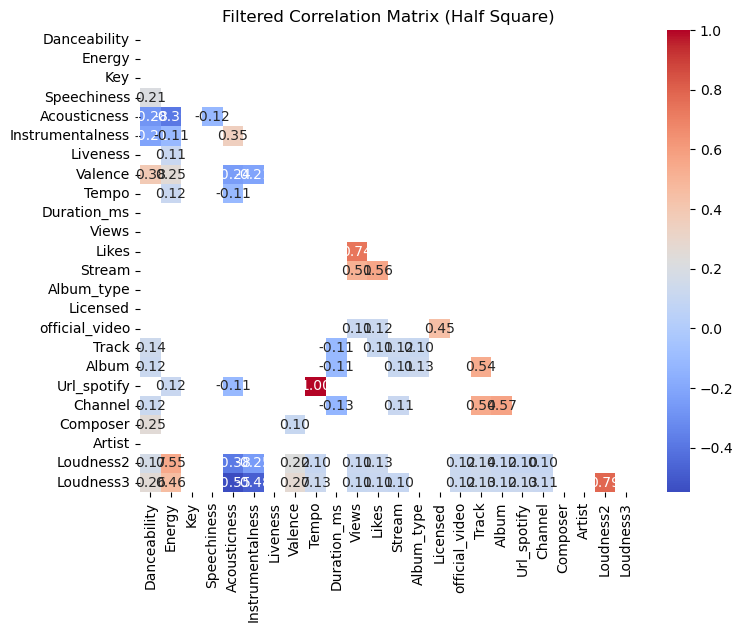

In [43]:
corr_matrix_with_threshold(train_imputed_loudness, 0.1)

In [44]:
test_imputed_loudness = imputed_df.iloc[len(df_train_embedding_important_simple):,:].reset_index(drop=True)
test_imputed_loudness

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness2,Loudness3
0,0.350403,6.0,0.177000,5.842771e-07,0.002330,0.230346,0.507000,138.559000,222640.000000,6.935552e+08,...,1.0,2.0,12977.0,9175.0,138.559000,1207.0,3.0,42.0,0.214833,-6.679000
1,0.347429,8.0,0.030200,2.529271e-02,0.000687,0.000099,0.852000,92.761000,200173.000000,7.201164e+07,...,1.0,1.0,12978.0,1.0,92.761000,1207.0,1.0,9.0,0.262120,-5.815000
2,0.786330,1.0,0.052200,7.676563e-05,0.026457,0.001561,0.551000,108.014000,215150.000000,8.435055e+06,...,1.0,2.0,0.0,5886.0,108.014000,1207.0,1.0,68.0,0.404576,-3.930000
3,0.403583,2.0,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,233867.000000,8.748155e+07,...,1.0,2.0,12979.0,9176.0,120.423000,1207.0,5.0,36.0,0.262422,-5.810000
4,0.334255,5.0,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,340920.000000,6.184810e+08,...,1.0,2.0,12980.0,9177.0,167.953000,1207.0,2.0,9.0,0.137183,-8.627000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,...,1.0,2.0,11307.0,4855.0,72.136829,2970.0,6.0,9.0,0.230840,-6.366894
6311,0.318585,10.0,0.073000,7.419596e-03,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,...,0.0,0.0,13251.0,3215.0,119.000000,4731.0,7.0,9.0,0.384719,-4.148566
6312,0.426223,5.0,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,...,1.0,0.0,0.0,6738.0,87.969239,5845.0,4.0,23.0,0.262570,-5.807545
6313,0.204440,5.0,0.037676,3.630868e-03,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,...,1.0,2.0,0.0,7696.0,119.000000,197.0,7.0,1.0,0.069760,-11.563964


In [45]:
arr_NOT_important_column = [ 'Loudness2']

train_imputed = remove_unimportant_column(train_imputed_loudness, arr_NOT_important_column)
test_imputed = remove_unimportant_column(test_imputed_loudness, arr_NOT_important_column)

In [46]:
train_imputed

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness3
0,0.0,0.000273,3.0,0.044300,7.241508e-01,0.000062,0.000807,0.340000,83.398,117907.0,...,0.0,0.0,0.0,0.0,0.0,83.398,0.0,10.0,0.0,-25.176000
1,0.0,0.184220,7.0,0.185267,6.722214e-01,0.910000,0.034966,0.746000,148.692,173427.0,...,1.0,0.0,1.0,1.0,1.0,148.692,1.0,1.0,1.0,-9.006641
2,0.0,0.266445,6.0,0.061167,6.676276e-01,0.867000,0.001772,0.380000,84.899,150667.0,...,1.0,0.0,0.0,2.0,2.0,84.899,1.0,1.0,2.0,-15.596000
3,1.0,0.209585,5.0,0.027700,3.796416e-03,0.000968,0.001000,0.406469,150.220,265000.0,...,0.0,1.0,1.0,3.0,3.0,150.220,2.0,2.0,3.0,-6.251000
4,4.0,0.325661,5.0,0.026000,3.048625e-06,0.000467,0.002924,0.295000,97.997,263867.0,...,0.0,1.0,2.0,4.0,4.0,97.997,2.0,3.0,4.0,-5.124413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,0.032800,8.991539e-02,0.000000,0.000591,0.658000,90.002,94667.0,...,1.0,1.0,2.0,12972.0,9170.0,90.002,5190.0,1.0,50.0,-6.344000
17166,2.0,0.820026,4.0,0.111367,2.195200e-05,0.000000,0.000786,0.657000,174.869,150857.0,...,2.0,1.0,1.0,12973.0,9171.0,174.869,5190.0,3.0,36.0,-1.786000
17167,1.0,0.571787,4.0,0.064700,1.923052e-02,0.000000,0.003652,0.419000,168.388,136842.0,...,2.0,1.0,2.0,12974.0,9172.0,168.388,4444.0,4.0,9.0,-4.679000
17168,1.0,0.451218,9.0,0.419000,4.511802e-02,0.410027,0.001260,0.539000,155.378,108387.0,...,2.0,1.0,2.0,12975.0,9173.0,155.378,5190.0,1.0,70.0,-18.514563


In [47]:
test_imputed

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness3
0,0.350403,6.0,0.177000,5.842771e-07,0.002330,0.230346,0.507000,138.559000,222640.000000,6.935552e+08,...,0.0,1.0,2.0,12977.0,9175.0,138.559000,1207.0,3.0,42.0,-6.679000
1,0.347429,8.0,0.030200,2.529271e-02,0.000687,0.000099,0.852000,92.761000,200173.000000,7.201164e+07,...,1.0,1.0,1.0,12978.0,1.0,92.761000,1207.0,1.0,9.0,-5.815000
2,0.786330,1.0,0.052200,7.676563e-05,0.026457,0.001561,0.551000,108.014000,215150.000000,8.435055e+06,...,2.0,1.0,2.0,0.0,5886.0,108.014000,1207.0,1.0,68.0,-3.930000
3,0.403583,2.0,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,233867.000000,8.748155e+07,...,0.0,1.0,2.0,12979.0,9176.0,120.423000,1207.0,5.0,36.0,-5.810000
4,0.334255,5.0,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,340920.000000,6.184810e+08,...,1.0,1.0,2.0,12980.0,9177.0,167.953000,1207.0,2.0,9.0,-8.627000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,...,0.0,1.0,2.0,11307.0,4855.0,72.136829,2970.0,6.0,9.0,-6.366894
6311,0.318585,10.0,0.073000,7.419596e-03,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,...,2.0,0.0,0.0,13251.0,3215.0,119.000000,4731.0,7.0,9.0,-4.148566
6312,0.426223,5.0,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,...,2.0,1.0,0.0,0.0,6738.0,87.969239,5845.0,4.0,23.0,-5.807545
6313,0.204440,5.0,0.037676,3.630868e-03,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,...,0.0,1.0,2.0,0.0,7696.0,119.000000,197.0,7.0,1.0,-11.563964


# Imputation "Composer" END

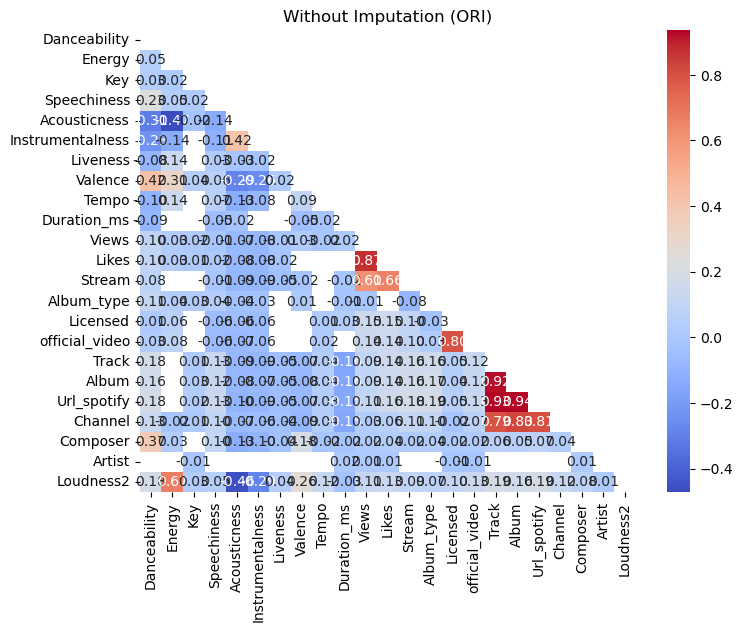

In [54]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.01, 'Without Imputation (ORI)')


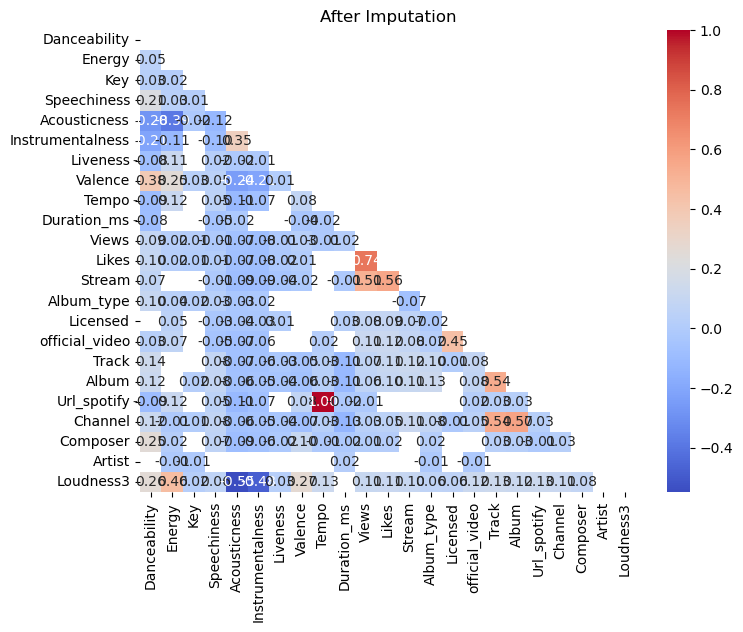

In [55]:
corr_matrix_with_threshold(train_imputed, 0.01, 'After Imputation')

In [56]:
from sklearn.model_selection import train_test_split
# train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

train_features, val_features, train_labels, val_labels = train_test_split(train_imputed.iloc[:, 1:], train_imputed.iloc[:, :1], test_size = 0.20, random_state = 42)

In [57]:
train_features

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness3
11068,0.237177,7.0,0.411000,4.295064e-03,0.000000,0.006435,0.627000,119.000,225131.0,52432531.0,...,1.0,1.0,2.0,8795.0,6221.0,119.000,3875.000000,5.0,16.0,-4.364000
16278,0.264609,7.0,0.287000,8.489664e-06,0.000000,0.000285,0.380333,179.974,131240.0,417959685.0,...,0.0,0.0,1.0,12386.0,8760.0,179.974,2913.000000,8.0,50.0,-6.257000
14511,0.895841,7.0,0.071800,9.910270e-13,0.000003,0.001443,0.592333,138.021,229773.0,58394962.0,...,0.0,0.0,0.0,11261.0,7999.0,138.021,3088.333333,6.0,53.0,-3.673000
13237,0.097972,5.0,0.035000,3.256607e-01,0.065932,0.024389,0.358000,79.035,211067.0,3196466.0,...,0.0,1.0,2.0,10368.0,5611.0,79.035,4431.000000,7.0,5.0,-4.421991
12870,0.500566,7.0,0.038500,1.968300e-02,0.000023,0.001953,0.532000,140.952,241893.0,87481554.0,...,0.0,1.0,2.0,0.0,1.0,140.952,5092.000000,10.0,9.0,-5.777671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.139798,0.0,0.167000,3.342554e-04,0.000020,0.001685,0.772000,107.990,225131.0,33106049.0,...,0.0,1.0,2.0,8021.0,1.0,107.990,3936.000000,8.0,0.0,-5.783000
11964,0.121287,2.0,0.036200,4.763795e-01,0.000000,0.000689,0.244000,119.000,291462.0,82725559.0,...,0.0,1.0,2.0,4690.0,3365.0,119.000,115.000000,3.0,31.0,-7.717943
5390,0.538525,0.0,0.276000,7.895359e-02,0.000000,0.003870,0.625000,85.114,233688.0,2726569.0,...,0.0,1.0,2.0,4397.0,3146.0,85.114,2140.000000,1.0,31.0,-5.569000
860,0.125752,0.0,0.167000,3.701462e-01,0.000000,0.016975,0.509000,179.615,107267.0,1292138.0,...,0.0,1.0,1.0,709.0,529.0,179.615,330.000000,5.0,18.0,-12.861000


In [58]:
train_labels

,Danceability
11068,9.0
16278,7.0
14511,2.0
13237,2.0
12870,6.0
...,...
11284,9.0
11964,3.0
5390,1.0
860,4.0


In [59]:
val_features

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Album_type,Licensed,official_video,Track,Album,Url_spotify,Channel,Composer,Artist,Loudness3
3706,0.024642,7.0,0.0368,0.525558,0.000000,0.042875,0.305,73.638,242960.0,1440157.0,...,1.0,0.0,0.0,3065.0,2200.0,73.638,4334.0,10.0,16.0,-9.930
2518,0.015253,10.0,0.0306,0.061177,0.000000,0.001191,0.119,137.920,225131.0,28007350.0,...,0.0,1.0,2.0,2079.0,1498.0,137.920,964.0,10.0,52.0,-10.553
6959,0.075687,10.0,0.0324,0.099897,0.000000,0.001331,0.509,131.903,225131.0,108416965.0,...,0.0,1.0,2.0,5626.0,4007.0,131.903,115.0,2.0,9.0,-8.702
5396,0.827936,0.0,0.0475,0.000097,0.000000,0.001405,0.684,116.044,221947.0,450948690.0,...,1.0,1.0,2.0,4402.0,3147.0,116.044,2144.0,4.0,20.0,-4.282
13691,0.338693,2.0,0.0664,0.005338,0.000000,0.001331,0.611,176.089,228169.0,88877.0,...,2.0,1.0,2.0,9773.0,7559.0,176.089,4538.0,1.0,31.0,-4.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,0.504358,6.0,0.0330,0.007189,0.000000,0.016196,0.924,140.072,166436.0,163676870.0,...,2.0,2.0,1.0,0.0,6476.0,140.072,4001.0,2.0,33.0,-4.611
15205,0.389017,0.0,0.1340,0.001260,0.005290,0.007301,0.421,91.966,212304.0,87481554.0,...,0.0,1.0,2.0,10142.0,7160.0,91.966,4348.0,5.0,15.0,-3.865
7654,0.410172,3.0,0.0414,0.014706,0.000021,0.000597,0.645,140.030,166929.0,1012364.0,...,0.0,0.0,2.0,6164.0,4375.0,140.030,4001.0,2.0,30.0,-7.146
6141,0.822657,10.0,0.2860,0.003949,0.000000,0.193341,0.749,132.067,219493.0,87481554.0,...,1.0,2.0,1.0,4990.0,3576.0,132.067,2413.0,7.0,15.0,-2.871


In [60]:
val_labels

,Danceability
3706,0.0
2518,0.0
6959,5.0
5396,3.0
13691,1.0
...,...
11569,7.0
15205,8.0
7654,7.0
6141,7.0


# All Data

# Try Sofi's Ensemble  (Cascade Level 1)
## Main Feature: Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Composer

In [61]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [62]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [86]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


import pickle
# scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
#     pred = reg.predict(train_features)
#     accuracy = accuracy_score(np.ravel(train_labels), np.rint(pred))
#     mae = mean_absolute_error(np.ravel(train_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table


Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.267036,0.196564
ExtraTreesClassifier,1.837798,0.272277
LGBWrapper,1.575131,0.187245
RandomForestRegressor,1.666570,0.168026
RandomForestRegressor,1.670064,0.167443
XGBRegressor,1.655504,0.167152
OneVsOneClassifier,1.817123,0.253058


In [87]:
result_table


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.267036,0.196564
ExtraTreesClassifier,1.837798,0.272277
LGBWrapper,1.575131,0.187245
RandomForestRegressor,1.666570,0.168026
RandomForestRegressor,1.670064,0.167443
XGBRegressor,1.655504,0.167152
OneVsOneClassifier,1.817123,0.253058


In [88]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.20168067226890757


In [89]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.20168067226890757


In [90]:
# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        train_imputed.iloc[:, 1:],                # Full X data
        np.ravel(train_imputed.iloc[:, :1])       # Full Y label
    )

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


In [91]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, test_imputed)


In [92]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)

In [93]:
np.rint(predictionsTest)

array([6., 6., 3., ..., 4., 6., 7.])